<a href="https://colab.research.google.com/github/Belal42-O/Time-Series-Forecasting-project/blob/main/time_series_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting**

Source:https://www.kaggle.com/datasets/neuromusic/avocado-prices

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pip install prophet

In [7]:
from prophet import Prophet

In [8]:
avo=pd.read_csv("/content/avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
avo.isna().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [11]:
avo.sort_values(by="Date",inplace=True)

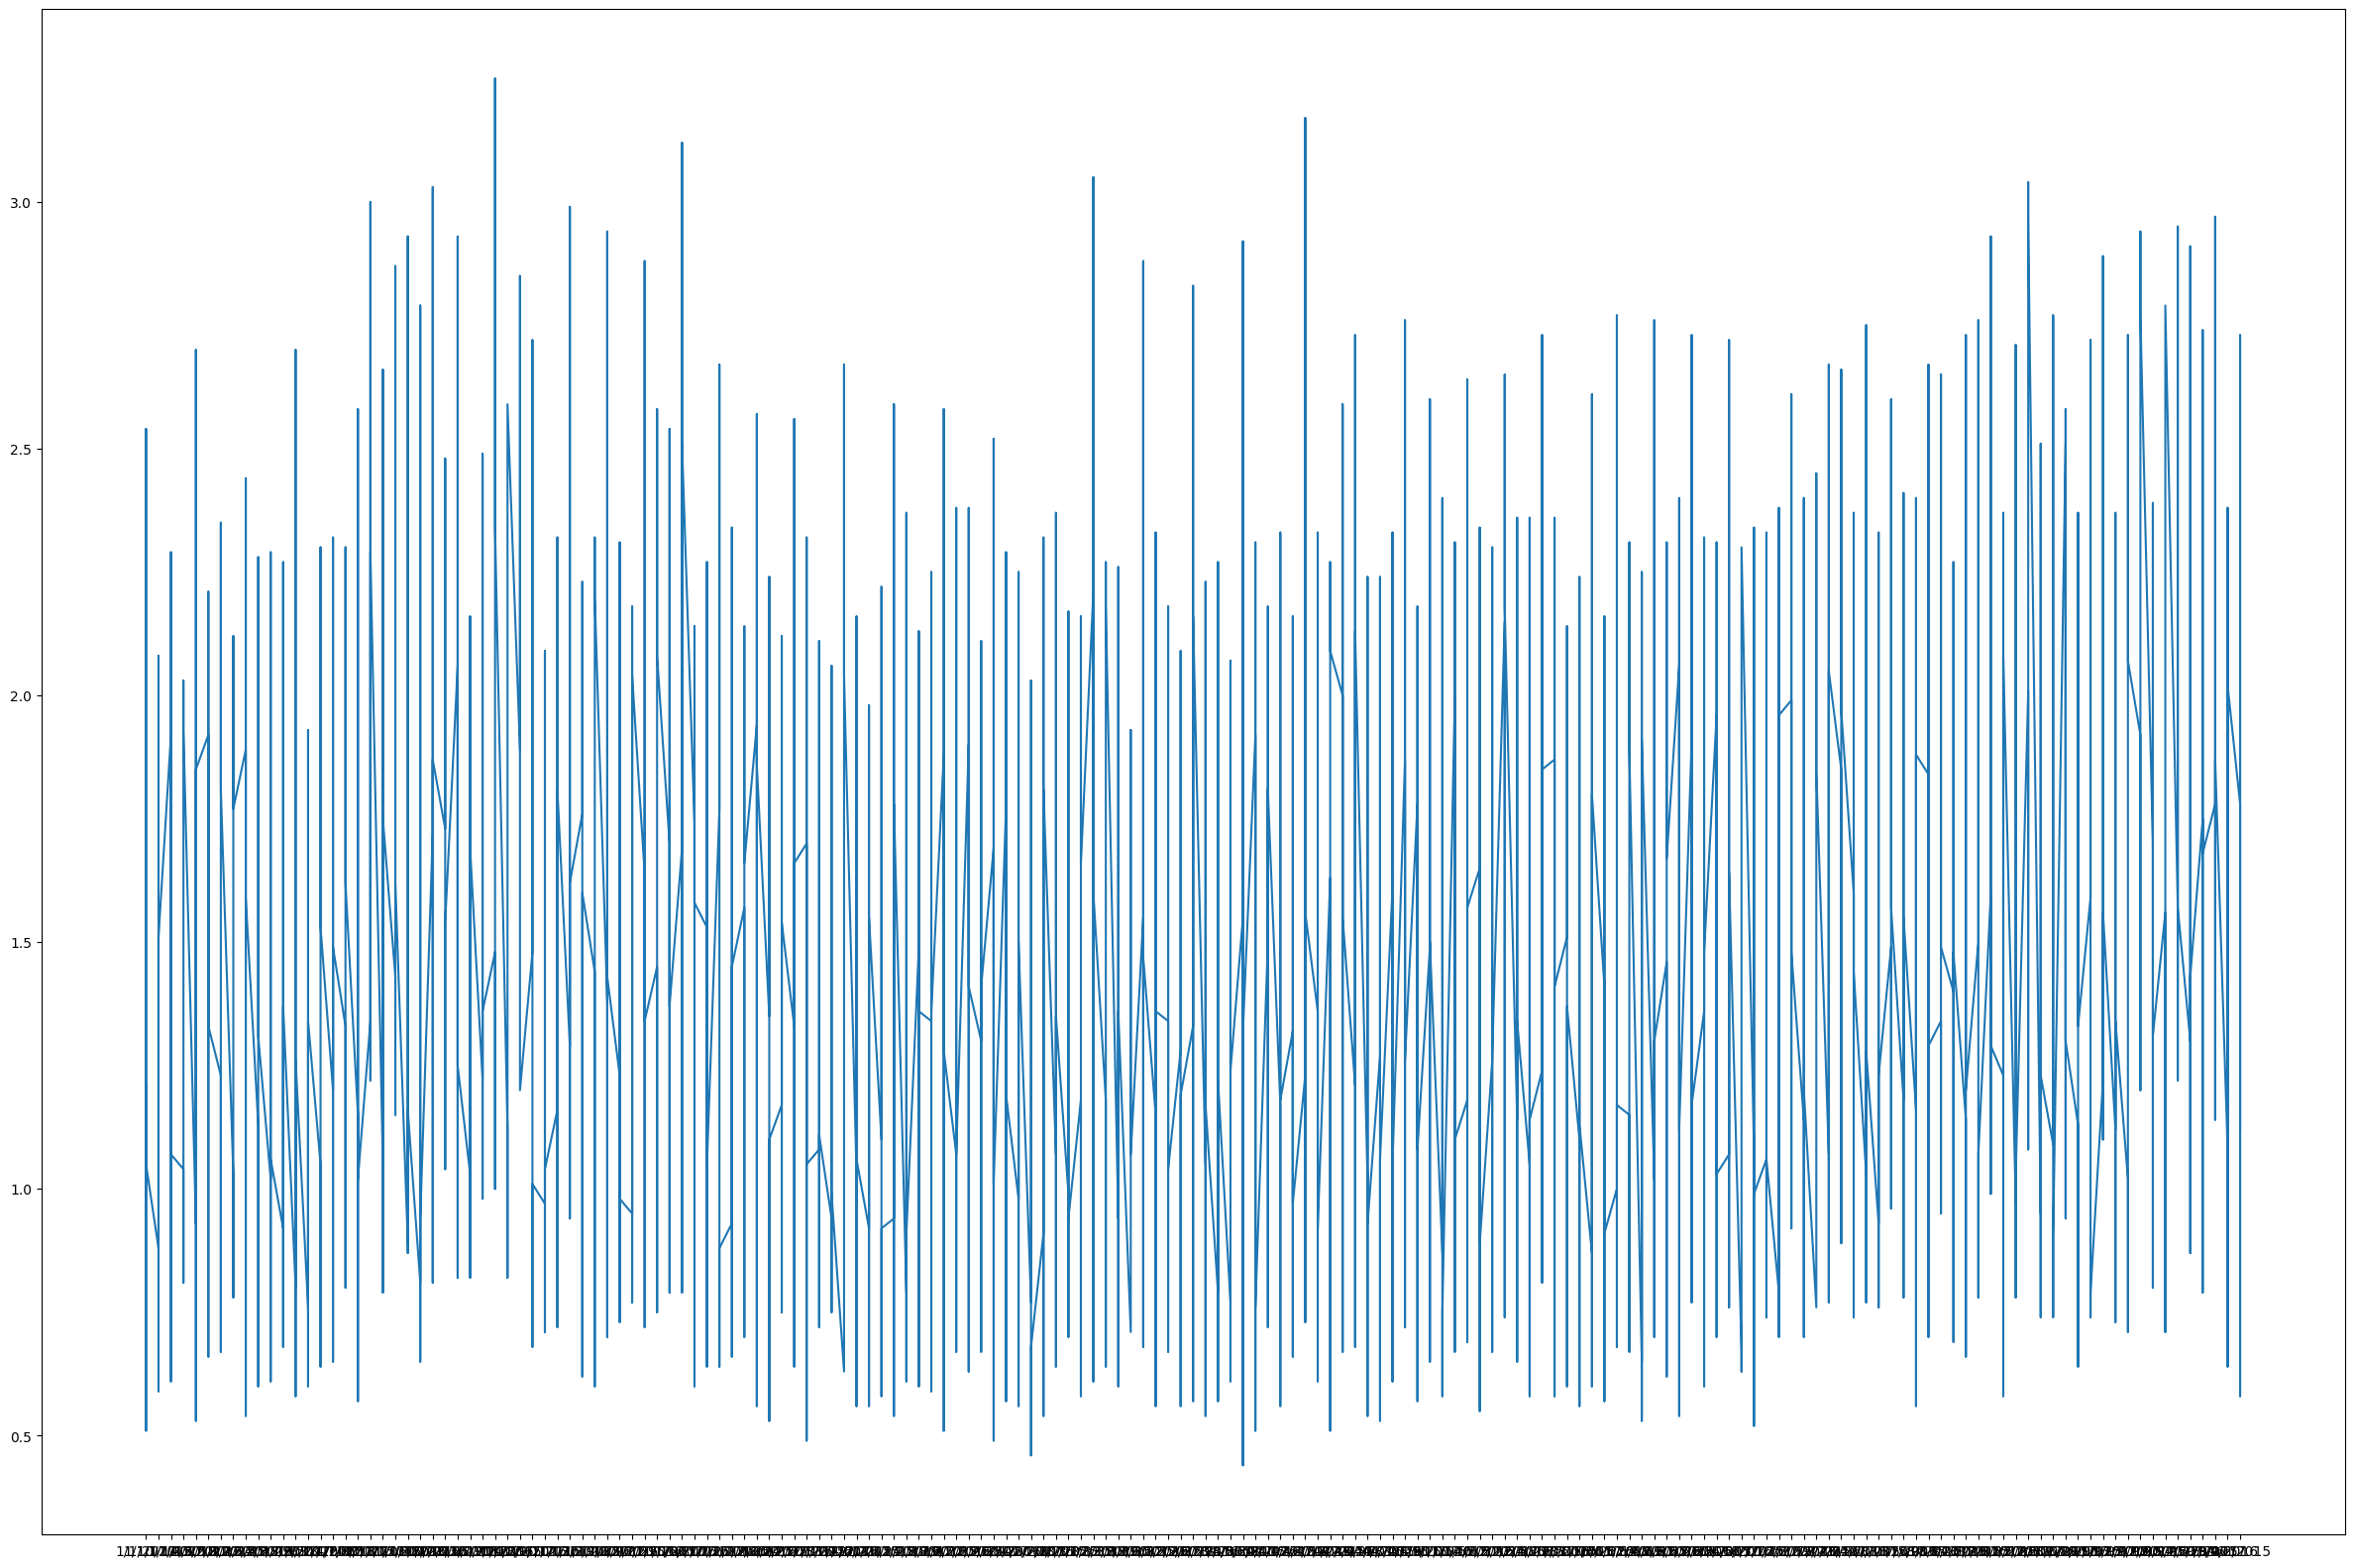

In [12]:
plt.figure(figsize=(30,20))
plt.plot(avo["Date"],avo["AveragePrice"])


<Axes: xlabel='year', ylabel='count'>

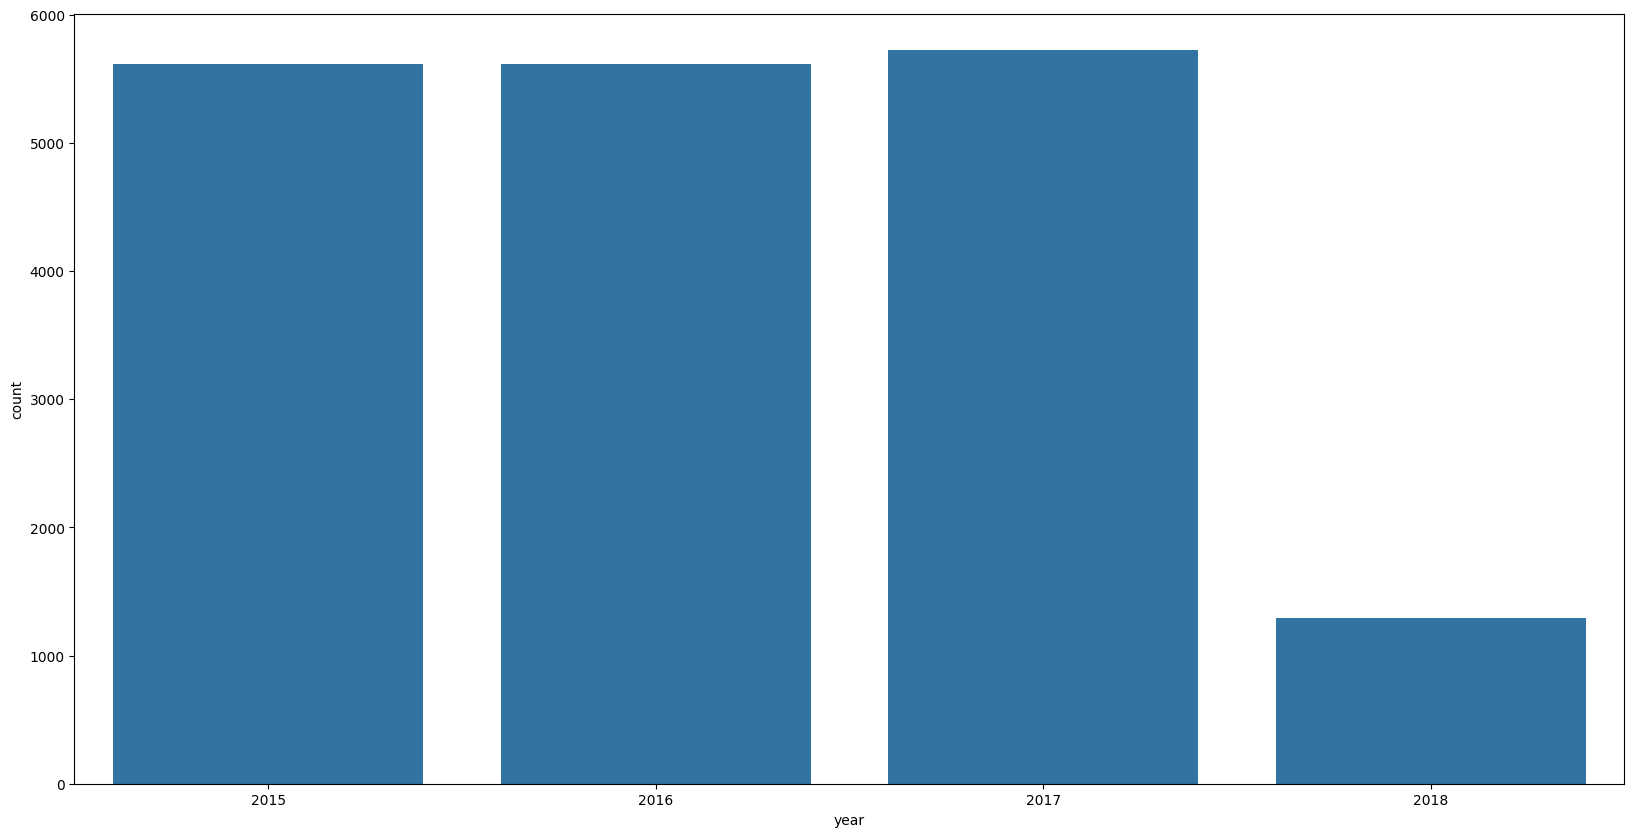

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='year',data=avo)

# preprocessing


In [14]:
avo_prophet=avo[["Date","AveragePrice"]]
avo_prophet

,Date,AveragePrice
6039,1/1/2017,1.21
5827,1/1/2017,0.92
6516,1/1/2017,1.35
15323,1/1/2017,1.58
15853,1/1/2017,1.24
...,...,...
10130,9/6/2015,1.62
2200,9/6/2015,1.54
10182,9/6/2015,2.07
900,9/6/2015,1.27


In [15]:
avo_prophet.columns=["ds","y"]
model=Prophet()
model.fit(avo_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5eayh4_d/af379zfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5eayh4_d/ffoe_zux.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65264', 'data', 'file=/tmp/tmp5eayh4_d/af379zfm.json', 'init=/tmp/tmp5eayh4_d/ffoe_zux.json', 'output', 'file=/tmp/tmp5eayh4_d/prophet_modelcuf7d1e9/prophet_model-20250728092248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
future=model.make_future_dataframe(periods=365)
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [17]:
future.tail()
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496024,0.914833,1.879347,1.496024,1.496024,-0.113020,-0.113020,-0.113020,-0.113020,-0.113020,-0.113020,0.0,0.0,0.0,1.383004
1,2015-01-11,1.491099,0.912086,1.898319,1.491099,1.491099,-0.104444,-0.104444,-0.104444,-0.104444,-0.104444,-0.104444,0.0,0.0,0.0,1.386655
2,2015-01-18,1.486174,0.878130,1.868567,1.486174,1.486174,-0.104126,-0.104126,-0.104126,-0.104126,-0.104126,-0.104126,0.0,0.0,0.0,1.382049
3,2015-01-25,1.481249,0.882071,1.851205,1.481249,1.481249,-0.123184,-0.123184,-0.123184,-0.123184,-0.123184,-0.123184,0.0,0.0,0.0,1.358065
4,2015-02-01,1.476325,0.851911,1.817583,1.476325,1.476325,-0.151652,-0.151652,-0.151652,-0.151652,-0.151652,-0.151652,0.0,0.0,0.0,1.324673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.165075,0.567665,1.619680,0.993689,1.335782,-0.086294,-0.086294,-0.086294,-0.086294,-0.086294,-0.086294,0.0,0.0,0.0,1.078781
530,2019-03-22,1.164350,0.564642,1.559384,0.992542,1.335761,-0.084611,-0.084611,-0.084611,-0.084611,-0.084611,-0.084611,0.0,0.0,0.0,1.079739
531,2019-03-23,1.163626,0.581034,1.629818,0.991396,1.335741,-0.082654,-0.082654,-0.082654,-0.082654,-0.082654,-0.082654,0.0,0.0,0.0,1.080972
532,2019-03-24,1.162902,0.559222,1.623927,0.990249,1.335721,-0.080443,-0.080443,-0.080443,-0.080443,-0.080443,-0.080443,0.0,0.0,0.0,1.082459


In [18]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.078781,0.567665,1.619680
530,2019-03-22,1.079739,0.564642,1.559384
531,2019-03-23,1.080972,0.581034,1.629818
532,2019-03-24,1.082459,0.559222,1.623927
533,2019-03-25,1.084173,0.552069,1.580190


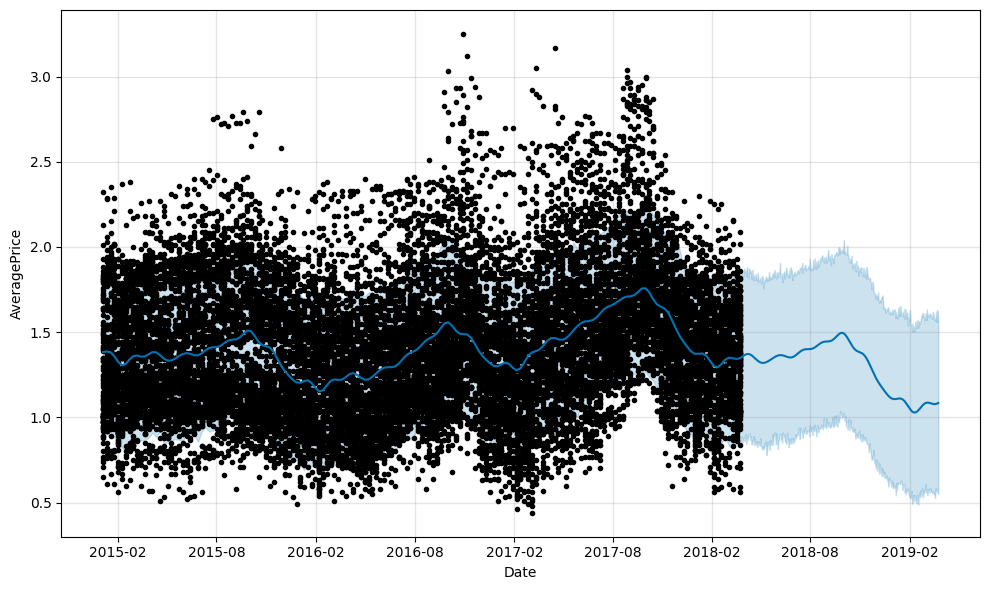

In [19]:
fig_forecast=model.plot(forecast,xlabel="Date",ylabel="AveragePrice")


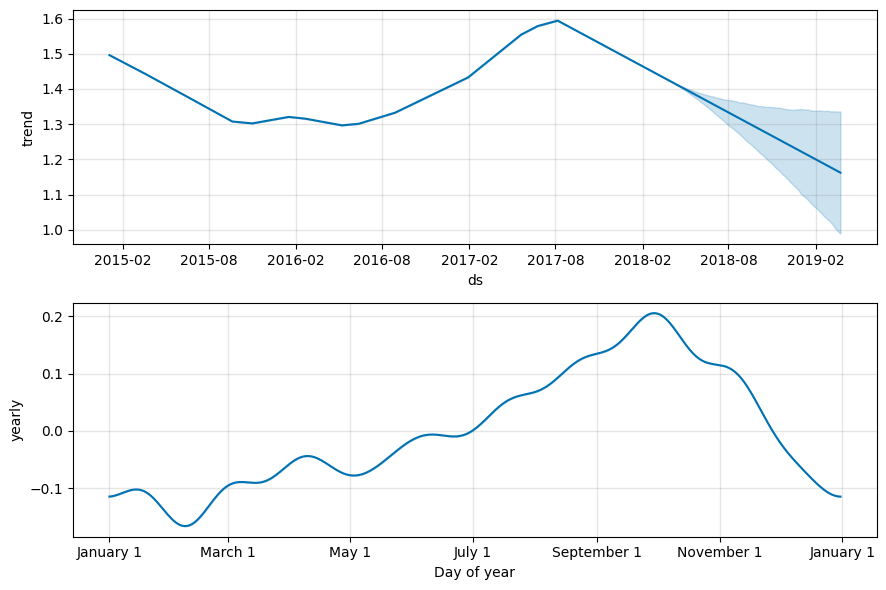

In [20]:
fig_model=model.plot_components(forecast)